In [ ]:
!nvidia-smi

In [ ]:
#connect to google drive: CLICK THE LINK GENERATED AND login to google sccount for where to start working AND COPY + PASTE the authoriization code 
!pip install google-drive-to-sqlite
!google-drive-to-sqlite auth #for sql access to google drive from where the saved data list can be accessed

!pip install gshell
!gshell init #for uploading the files generated as outputs

# Setup
**Make sure to read the instructions carefully!**

***upload & rename*** blender file ( *particles.blend* ) to google drive. make a folder ***blenderoutput*** in google drive for storage of the outputs directly
___
* `blender_version` : Version of blender used to render the scene.
* `blend_file_id` : Google drive file url `https://drive.google.com/file/d/14rU-w4UwEkRoslf6zGqFceu5ade7AU_O/view?usp=sharing ` use ***14rU-w4UwEkRoslf6zGqFceu5ade7AU_O*** as *file_id*
___
* `start_frame, end_frame` : Specify the start and end frame for animation. You may put same value such as 5 or 6 for both input to set the default *frame 5* or *frame 6* in the blend file.
___
* `output_directory_id` : Google drive folder url `https://drive.google.com/drive/u/0/folders/1ph2v7i3Qm8U6KVPh1DEJ1UCXRKVMYEY0 ` use ***1ph2v7i3Qm8U6KVPh1DEJ1UCXRKVMYEY0*** as *directory_id*

___
* `gpu_enabled, cpu_enabled` : Toggle GPU and CPU for rendering. CPU might give a slight boost in rendering time but may varies depend on the project.
___
* `blend_file_path` : `'/content/particles.blend'` keep as `'/content/ABC.blend'` put ABC as your blender file name. e.g. if file name is cat.blend >>> `'/content/cat.blend'`


* `temp_output_path` : = `'/content/out'` **NO CHANGES REQUIRED**
* `output_name` : `blender-####` **NO CHANGES REQUIRED**


After you are done, go to Runtime > Run All (Ctrl + F9) . See the [GitHub repo](https://github.com/1kaiser/blender-colab) for more info.

In [ ]:
blender_version = '3.0.1' #@param ['2.79b', '2.80rc3', '2.81a', '2.82a', '2.83.18', '2.90.1', '2.91.2', '2.92.0', '2.93.6', '3.0.0', '3.0.1'] {allow-input: false}
blend_file_id = '14rU-w4UwEkRoslf6zGqFceu5ade7AU_O' #@param {type: 'string'}
start_frame =  1#@param {type: 'integer'}
end_frame =  250#@param {type: 'integer'}
output_directory_id = '1ph2v7i3Qm8U6KVPh1DEJ1UCXRKVMYEY0' #@param ['xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'] {allow-input: true}
#@markdown ---
gpu_enabled = True #@param {type:"boolean"}
cpu_enabled = True #@param {type:"boolean"}
#@markdown ---
blend_file_path = '/content/particles.blend' #@param {type: 'string'}
temp_output_path = '/content/out' #@param {type: 'string'}
output_name = 'blender-####' #@param {type: 'string'}
#@markdown ---


In [ ]:
import os
blender_url_dict = {'2.79b'   : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.79/blender-2.79b-linux-glibc219-x86_64.tar.bz2",
                    '2.80rc3' : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.80/blender-2.80rc3-linux-glibc217-x86_64.tar.bz2",
                    '2.81a'   : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.81/blender-2.81a-linux-glibc217-x86_64.tar.bz2",
                    '2.82a'   : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.82/blender-2.82a-linux64.tar.xz",
                    '2.83.18' : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.83/blender-2.83.18-linux-x64.tar.xz",
                    '2.90.1'  : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.90/blender-2.90.1-linux64.tar.xz",
                    '2.91.2'  : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.91/blender-2.91.2-linux64.tar.xz",
                    '2.92.0'  : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.92/blender-2.92.0-linux64.tar.xz",
                    '2.93.6'  : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.93/blender-2.93.6-linux-x64.tar.xz",
                    '3.0.0'   : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender3.0/blender-3.0.0-linux-x64.tar.xz",
                    '3.0.1'   : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender3.0/blender-3.0.1-linux-x64.tar.xz"}

blender_url = blender_url_dict[blender_version]
base_url = os.path.basename(blender_url)

!mkdir $blender_version
!wget -nc $blender_url
!tar -xkf $base_url -C ./$blender_version --strip-components=1

#Deletes the Default libtcmalloc-minimal4 version and installs the Ubuntu default version
import os

os.environ["LD_PRELOAD"] = ""

#Deletes wrong Version of libtcmalloc-minimal4
!apt remove libtcmalloc-minimal4
#Installs correct version of libtcmalloc-minimal4
!apt install libtcmalloc-minimal4

#Adds this library to the user environment
os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0"

In [ ]:
# Enable GPU rendering (or add custom properties here)
data = "import re\n"+\
    "import bpy\n"+\
    "scene = bpy.context.scene\n"+\
    "scene.cycles.device = 'GPU'\n"+\
    "prefs = bpy.context.preferences\n"+\
    "prefs.addons['cycles'].preferences.get_devices()\n"+\
    "cprefs = prefs.addons['cycles'].preferences\n"+\
    "print(cprefs)\n"+\
    "for compute_device_type in ('CUDA', 'OPENCL', 'NONE'):\n"+\
    "    try:\n"+\
    "        cprefs.compute_device_type = compute_device_type\n"+\
    "        print('Device found:',compute_device_type)\n"+\
    "        break\n"+\
    "    except TypeError:\n"+\
    "        pass\n"+\
    "for device in cprefs.devices:\n"+\
    "    if not re.match('intel', device.name, re.I):\n"+\
    "        print('Activating',device)\n"+\
    "        device.use = "+str(gpu_enabled)+"\n"+\
    "    else:\n"+\
    "        device.use = "+str(cpu_enabled)+"\n"
with open('setgpu.py', 'w') as f:
    f.write(data)

In [ ]:
!mkdir -p '{temp_output_path}'
!rm -r '{blend_file_path}'
!gshell download -i '{blend_file_id}'

if not temp_output_path.endswith('/'):
    temp_output_path += '/'
    
output_path = temp_output_path + output_name

nooffiles=''

import json


frame = start_frame - 1
while frame < end_frame  :
  file=[]
  file=!google-drive-to-sqlite files --folder '{output_directory_id}' --nl 
  count=0
  k=1 
  while k!=len(file):
    b = json.loads(file[k]) 
    if(b["trashed"]==0): 
      count+=1  
    k+=1
  frame = count
  !./$blender_version/blender -b '{blend_file_path}' -P setgpu.py -E CYCLES -o '{output_path}' -noaudio -f $frame
  !gshell upload --parent '{output_directory_id}' --recursive '{temp_output_path}'/*
  !rm -r '{temp_output_path}'/*


# WORKING PROCESS
```
#
```
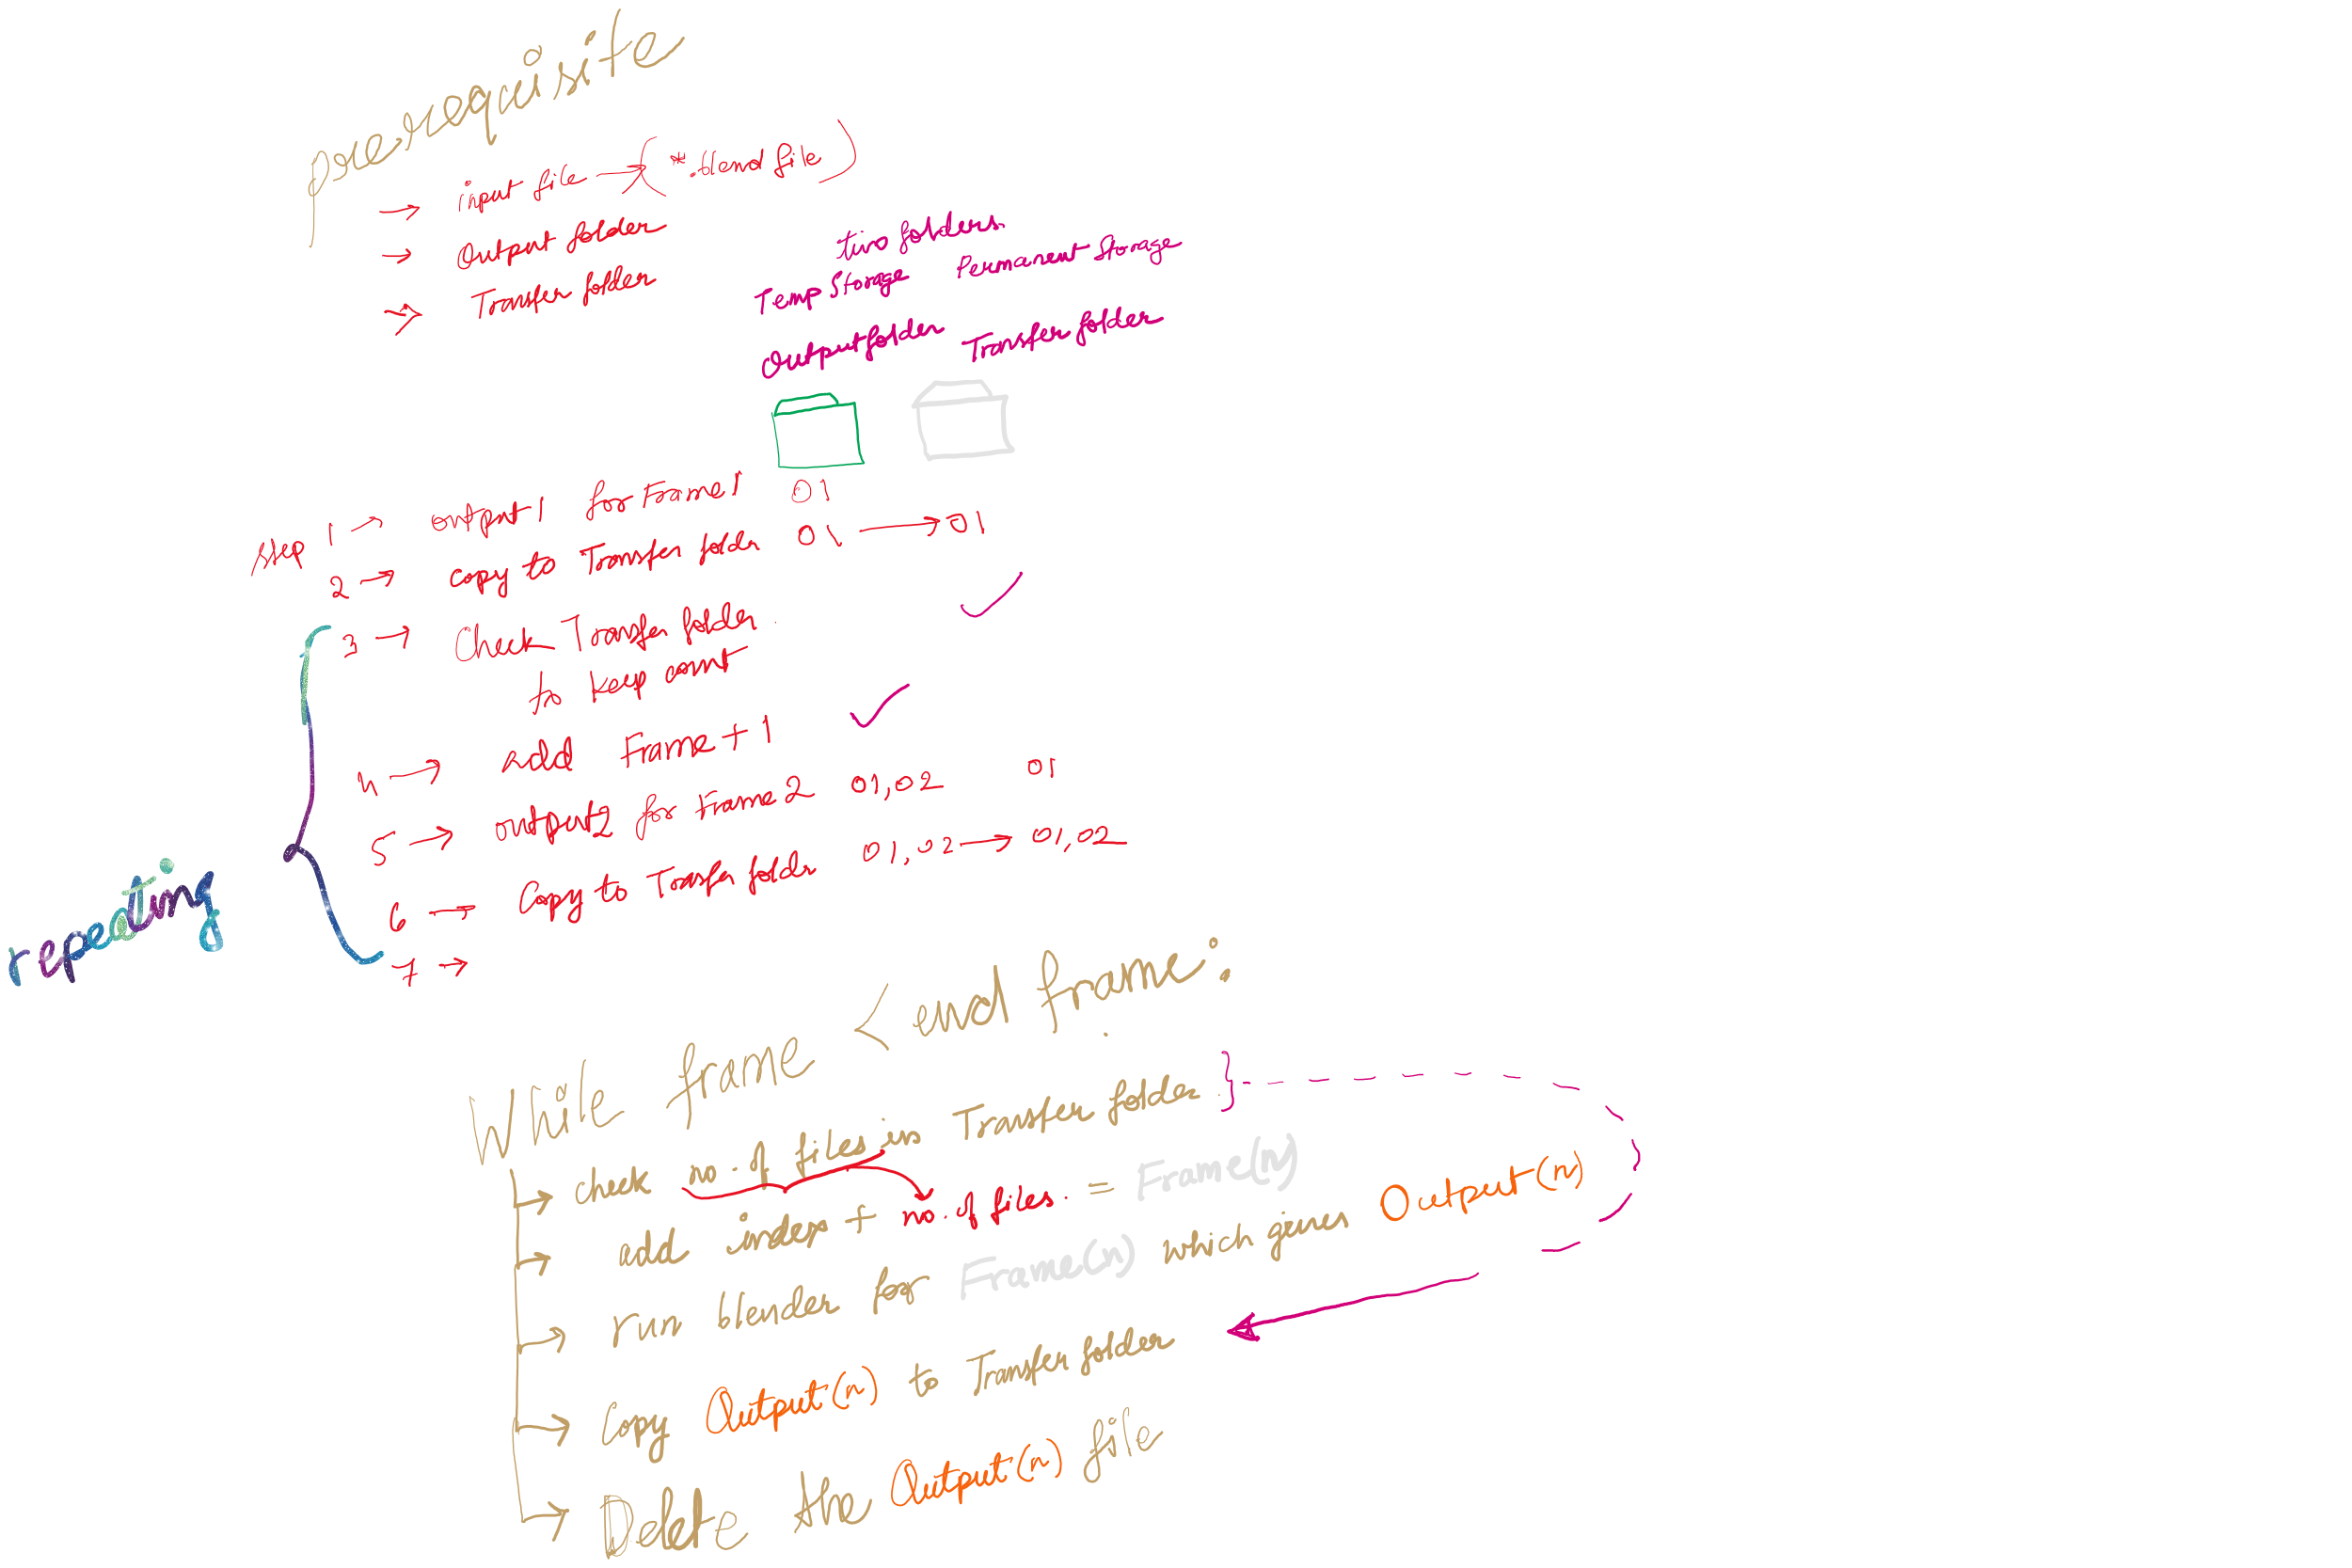

# ***EXIT SECTION***

testing add addon :: `flip_fluid_addon`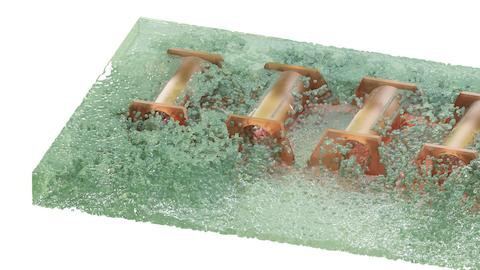

In [ ]:
addon_file_id = '1smlyWDW1TmXmJIU6d50bfr86UmCzrZuu' #@param {type: 'string'}
addon_path = '/content/flip_fluids_addon.zip' #@param {type: 'string'}



In [ ]:
!gshell download -i '{addon_file_id}'


In [ ]:
# Enable add on (or add custom properties here)
data = "import bpy\n"+\
    "bpy.ops.preferences.addon_install(overwrite=True, filepath="+'"'+addon_path+'"'+")\n"+\
    "bpy.ops.preferences.addon_enable(module='flip_fluids_addon')\n"+\
    "bpy.ops.flip_fluid_operators.reset_bake()\n"+\
    "bpy.ops.flip_fluid_operators.bake_fluid_simulation_cmd()\n"
with open('addon.py', 'w') as f:
    f.write(data)

In [ ]:

gpu_enabled = True #@param {type:"boolean"}
cpu_enabled = True #@param {type:"boolean"}
blend_file_path = '/content/untitled.blend' #@param {type: 'string'}
temp_output_path = '/content/out' #@param {type: 'string'}
output_name = 'blender-####' #@param {type: 'string'}
#@markdown ---
frame =38
if not temp_output_path.endswith('/'):
    temp_output_path += '/'
    
output_path = temp_output_path + output_name


In [ ]:
  !sudo ./$blender_version/blender -b '{blend_file_path}' -P addon.py -E CYCLES -o '{output_path}' -noaudio -f $frame


In [ ]:
# Enable add on (or add custom properties here)
data = "import bpy\n"+\
    "bpy.ops.wm.addon_install(overwrite=True, filepath="+addon_path+")\n"+\
    "bpy.ops.wm.addon_enable(module="")\n"
with open('addon.py', 'w') as f:
    f.write(data)

another type of capability

In [ ]:
!gshell cd --with-id '{output_directory_id}'
!mkdir -p '{temp_output_path}'
!rm -r '{blend_file_path}'
!gshell download -i '{blend_file_id}'

if not temp_output_path.endswith('/'):
    temp_output_path += '/'
    
output_path = temp_output_path + output_name

nooffiles=''
frame = start_frame - 1
while frame < end_frame  :
  nooffiles = !gshell ls
  frame = len(nooffiles) + 1
  !./$blender_version/blender -b '{blend_file_path}' -P setgpu.py -E CYCLES -o '{output_path}' -noaudio -f $frame
  !gshell upload --parent '{output_directory_id}' --recursive '{temp_output_path}'/*
  !rm -r '{temp_output_path}'/*

testing new synchronization method using `google-drive-to-sqlite` from `gshell` as listing files are limited to 100 nos.

In [ ]:
!pip install google-drive-to-sqlite
!google-drive-to-sqlite auth #for sql access to google drive from where the saved data list can be accessed

In [ ]:
import json
file=[]
file=!google-drive-to-sqlite files --folder 1ph2v7i3Qm8U6KVPh1DEJ1UCXRKVMYEY0 --nl 
#print(type(file))
print(len(file))
count=0
k=1           #k = 1 is taken as <class 'IPython.utils.text.SList'> variable file  first row is the  describtion of the folder itself
while k!=len(file):
  b = json.loads(file[k])   #converts  <class 'IPython.utils.text.SList'> first row to dictionary
  #print(b)
  #print(type(file[0]))
  #print(b["trashed"])
  if(b["trashed"]==0): #checking if the file is trashed or not i.e. (trashed = 1 , untrashed = 0)
    count+=1    #difined above so that it can count the number of undeleted files as remaining would be equals to the available files
  k+=1
print(count)  #now we can use the count value confidently to keep track of files uploaded and available so that we can start processing the next file i.e. count+1=== 

<class 'IPython.utils.text.SList'>
119
101


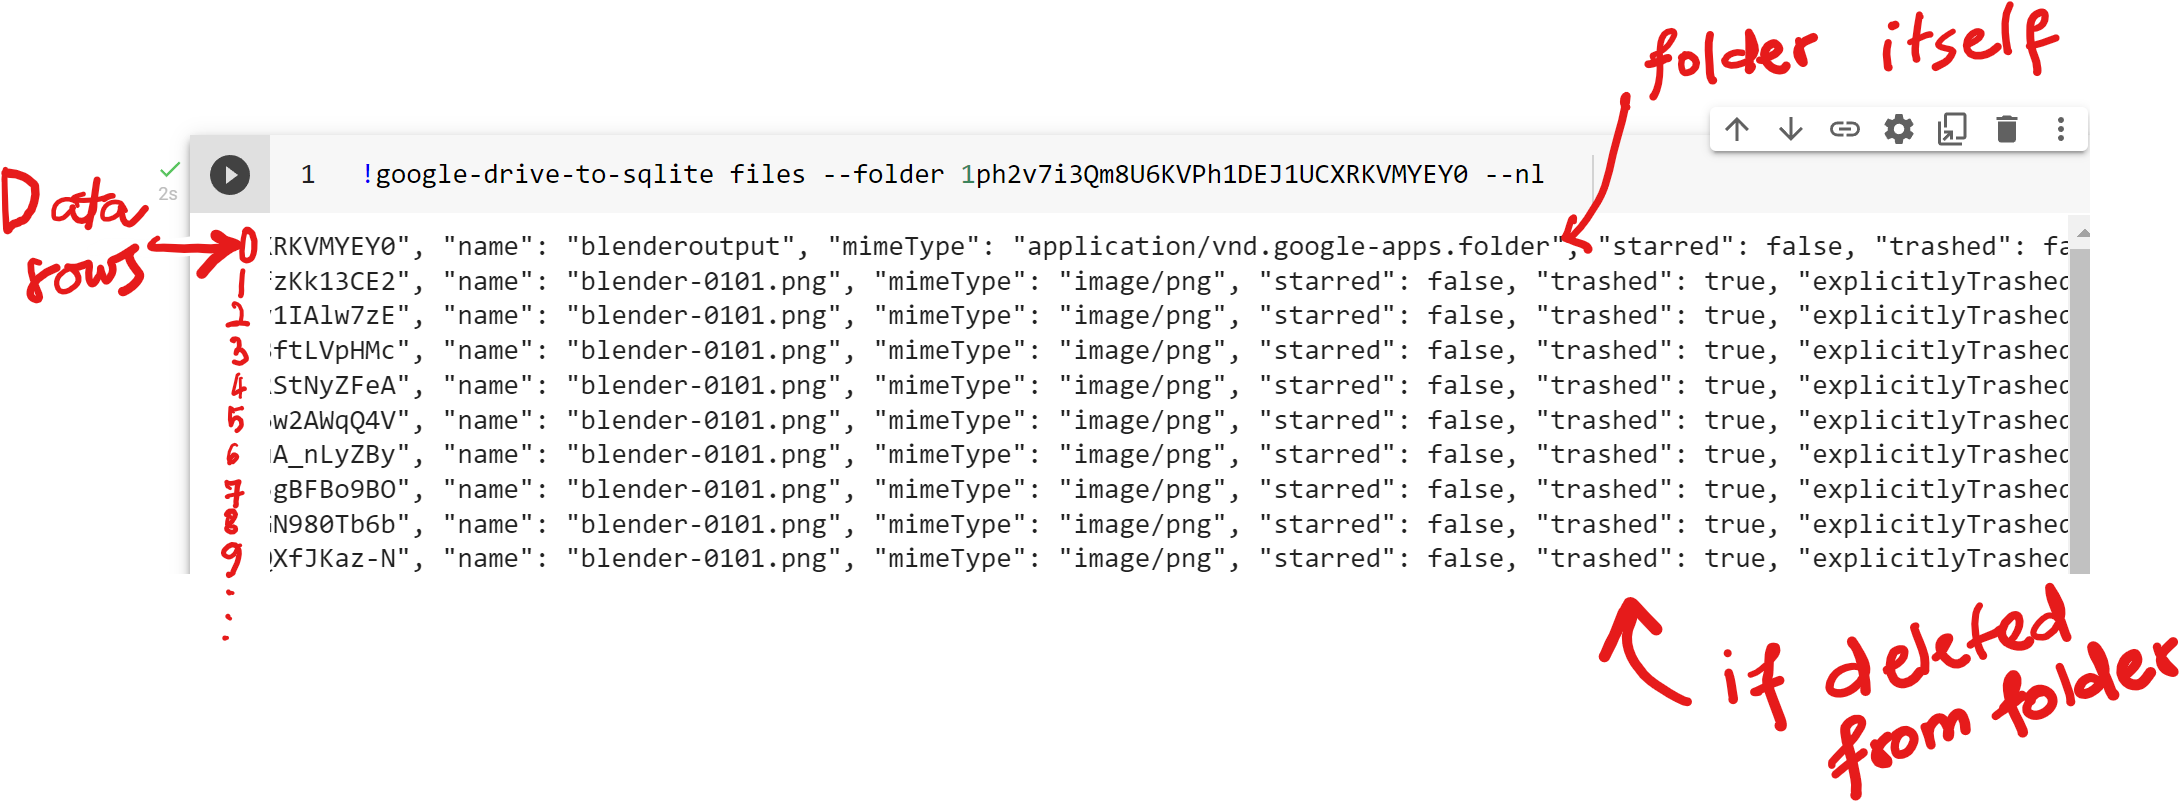

In [ ]:
!google-drive-to-sqlite files --folder 1ph2v7i3Qm8U6KVPh1DEJ1UCXRKVMYEY0 --nl 

In [ ]:
!google-drive-to-sqlite files --folder 1E6Zg2X2bjjtPzVfX8YqdXZDCoB3AVA7i --nl --stop-after 5 -q '"trashed": false'


## Disclaimer
The GPU used in Google Colab is specialized for data centres, neural network etc, not rendering 3D scenes. Because the computing power provided are free, the usage limits, idle timeouts and speed of the rendering may varies. [ColabPro](https://colab.research.google.com/signup) is available for those who wanted to have more powerful GPU and longer session for rendering. See the [FAQ](https://research.google.com/colaboratory/faq.html) for more info about this platform. In some cases, it might be faster to use an online Blender renderfarm.

## License
```
MIT License

Copyright (c) 2020 syn73

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```